In [202]:
import pandas as pd
import numpy as np
import sketch
import matplotlib as plt
import seaborn as sns
import random
from datetime import datetime

In [58]:
df_client = pd.read_csv('npo_clnts.csv')
df_cntbr = pd.read_csv('npo_cntrbtrs.csv')
df_trans = pd.read_csv('npo_trnsctns.csv')

In [32]:
df_trans
df_trans_sum['window_sum'] = df_trans.groupby(by='npo_accnt_id')['npo_sum'].transform('sum')
#df_trans.info()
print('Minimal date: ', min(df_trans['npo_operation_date']), 'Maximum date: ', max(df_trans['npo_operation_date']))
len(df_trans['npo_accnt_id'].unique())

Minimal date:  1993-01-12 00:00:00 Maximum date:  2022-05-13 15:00:01


,npo_accnt_id,npo_sum,slctn_nmbr,npo_operation_date,npo_operation_group
0,0x05C7DF8BA2611640BE946E29CF20C6D2,1626.01,0,2011-11-11 00:00:00,0
1,0x05C7DF8BA2611640BE946E29CF20C6D2,8394.05,0,2010-08-30 00:00:00,1
2,0x05C7DF8BA2611640BE946E29CF20C6D2,1626.01,0,2007-03-12 00:00:00,0
3,0x05C7DF8BA2611640BE946E29CF20C6D2,3124.91,0,2016-08-31 00:00:00,1
4,0x05C7DF8BA2611640BE946E29CF20C6D2,1626.01,0,2016-11-05 00:00:00,0
...,...,...,...,...,...
12325091,0xA62F005056964A2C11EDF615B8E951D8,1945.85,2,2022-01-09 00:00:00,0
12325092,0x2206B6A6CCF6CB488D3E0EB08C5DDEE7,6.90,2,2018-11-18 00:00:00,1
12325093,0xD1E79F161573B44A848E6D74B3A5937A,135.82,2,2020-08-31 00:00:00,1
12325094,0xA62F005056964A2C11EDF0C687A20274,6189.23,2,2022-01-09 00:00:00,0


In [31]:
df_cntbr['sum'] = df_cntbr.groupby('clnt_id')['npo_pmnts_sum'].transform('sum')
#len(df_cntbr['npo_accnt_id'].unique())

248947

In [40]:
df_cntbr

,npo_accnt_id,clnt_id,accnt_pnsn_schm,slctn_nmbr,npo_accnt_status,npo_accnt_status_date,npo_blnc,npo_pmnts_sum,npo_pmnts_nmbr,npo_frst_pmnt_date,npo_lst_pmnt_date,npo_ttl_incm,sum
0,0x90B7458B8CBFF24980DEC312BA4A1AF5,0x85390230E8955E4FA736E62B0F0E3844,1.0,0,1,2001-05-14,10158.96,2276.42,1.0,2005-08-31,2005-08-31,5638.83,2276.42
1,0xC64D3161D31A8441A65224792D370CB3,0xC2B51FD4FE57F7479210FD7258DF5B0B,3.0,2,0,2018-10-30,NaN,230084.40,55.0,2013-03-07,2017-09-10,39875.30,230084.40
2,0xC92F1AA5587E2348BEF17432FBD6C2E6,0x8EC850934FF06A4AA0A856CF43B8D666,4.0,1,0,2014-01-20,NaN,7921.95,8.0,2012-11-26,2013-06-30,207.50,7921.95
3,0x8DDD2D186B990F43AD5FC9F5C7124E16,0xAF0A0745F8241548B01C4CDA068C51E8,5.0,0,0,2019-05-30,NaN,8130.08,1.0,2015-08-14,2015-08-14,6866.61,8130.08
4,0xA7F12C768A4FB38311E835E81716D8CD,0x943D2C768A4FB38311E65C7B0420641F,7.0,3,1,2007-04-16,NaN,NaN,NaN,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248942,0xBCC44D37FC13140845A0699ED3176332,0x943D2C768A4FB38311E6620FA24FEA7C,89.0,3,1,2022-02-25,813.00,813.00,1.0,2022-02-25,2022-02-25,NaN,813.00
248943,0x8120005056AB57EC11EE46637F6FF1F2,0x8120005056AB57EC11EE457B92B38BD8,33.0,0,1,2022-04-28,894.30,894.30,2.0,2022-04-28,2022-04-29,NaN,894.30
248944,0x8F61B56D1DD804804FDE77B593B577C5,0x8AC1000C2962068211EE0B7C30706716,89.0,3,1,2022-02-13,406.50,406.50,1.0,2022-02-13,2022-02-13,NaN,406.50
248945,0xA4EF00505692D0BC11EE2608583314E2,0x943D2C768A4FB38311E65F808C6C5D73,102.0,3,1,2022-03-18,1626.01,1626.01,2.0,2022-03-18,2022-03-20,NaN,1626.01


In [37]:
len(df_cntbr['slctn_nmbr'].unique())

4

In [59]:
df_cntbr['npo_accnt_status_date'] = pd.to_datetime(df_cntbr['npo_accnt_status_date'])
df_cntbr.set_index('npo_accnt_status_date', inplace=True)
df_cntbr['quarter'] = df_cntbr.index.to_period('Q')

In [81]:
quarterly_data = df_cntbr.groupby(['quarter', 'slctn_nmbr']).agg({'npo_accnt_id': 'count', 'npo_pmnts_sum': 'sum'})
quarterly_data.reset_index(inplace=True)
quarterly_data.tail()
quarterly_data = quarterly_data.loc[quarterly_data['quarter'] >= pd.Period('2005Q1')].reset_index(drop=True)
quarterly_data.to_csv('for_front.csv')

69

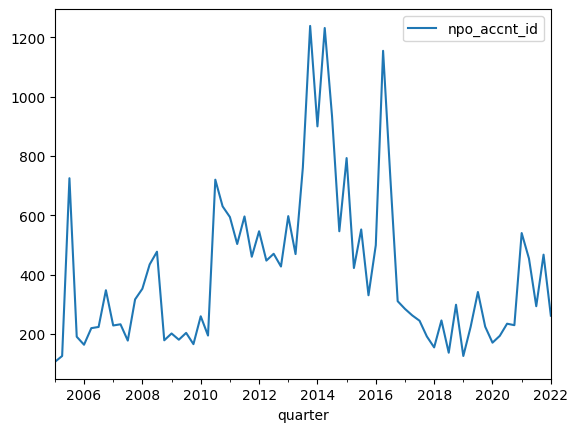

In [213]:
quarterly_data[quarterly_data['slctn_nmbr']==1].plot(x='quarter', y='npo_accnt_id')
len(quarterly_data[quarterly_data['slctn_nmbr']==1])

In [233]:
df_moex = pd.read_csv('MOEX.csv', sep=';', encoding='latin-1')
df_moex['TRADEDATE'] = pd.to_datetime(df_moex['TRADEDATE'])
df_moex.set_index('TRADEDATE', inplace=True)
df_moex['quarter'] = df_moex.index.to_period('Q')
df_moex

C:\Users\User\AppData\Local\Temp\ipykernel_16128\2280302718.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_moex['TRADEDATE'] = pd.to_datetime(df_moex['TRADEDATE'])


,BOARDID,SECID,SHORTNAME,NAME,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR,TRADINGSESSION,VOLUME,quarter
TRADEDATE,,,,,,,,,,,,,,,,,,
2005-11-01,SNDX,IMOEX,Èíäåêñ ÌîñÁèðæè,Èíäåêñ ÌîñÁèðæè,"547,85","552,18","556,2","542,78",3623395833,NaN,NaN,2,NaN,RUB,NaN,3,NaN,2005Q4
2005-12-01,SNDX,IMOEX,Èíäåêñ ÌîñÁèðæè,Èíäåêñ ÌîñÁèðæè,"545,31","547,85","550,68","539,63",4635828005,NaN,NaN,2,NaN,RUB,NaN,3,NaN,2005Q4
2005-01-13,SNDX,IMOEX,Èíäåêñ ÌîñÁèðæè,Èíäåêñ ÌîñÁèðæè,"543,9","545,38","546,77","539,59",3593473541,NaN,NaN,2,NaN,RUB,NaN,3,NaN,2005Q1
2005-01-14,SNDX,IMOEX,Èíäåêñ ÌîñÁèðæè,Èíäåêñ ÌîñÁèðæè,"548,69","543,91","553,62","543,36",3382889935,NaN,NaN,2,NaN,RUB,NaN,3,NaN,2005Q1
2005-01-17,SNDX,IMOEX,Èíäåêñ ÌîñÁèðæè,Èíäåêñ ÌîñÁèðæè,"544,04","548,69","558,36","544,04",5644911230,NaN,NaN,2,NaN,RUB,NaN,3,NaN,2005Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,SNDX,IMOEX,Èíäåêñ ÌîñÁèðæè,Èíäåêñ ÌîñÁèðæè,"2296,33","2267,43","2296,33","2263,99",26880489296,0.0,0.0,2,"1,09715E+13",RUB,4.777849e+09,3,NaN,2022Q3
2022-08-30,SNDX,IMOEX,Èíäåêñ ÌîñÁèðæè,Èíäåêñ ÌîñÁèðæè,"2306,62","2299,28","2314,53","2292,44",50550921071,0.0,0.0,2,"1,10207E+13",RUB,4.777849e+09,3,NaN,2022Q3
2022-08-31,SNDX,IMOEX,Èíäåêñ ÌîñÁèðæè,Èíäåêñ ÌîñÁèðæè,"2400,08","2377,02","2423,12","2368,42","1,02137E+11",0.0,0.0,2,"1,14672E+13",RUB,4.777849e+09,3,NaN,2022Q3


In [234]:
df_moex = df_moex.groupby('quarter').last().reset_index(inplace=False)
df_moex = df_moex[['quarter', 'VALUE']]
df_moex['VALUE'] = df_moex['VALUE'].str.replace(',', '')
df_moex['VALUE'] = pd.to_numeric(df_moex['VALUE'])

69

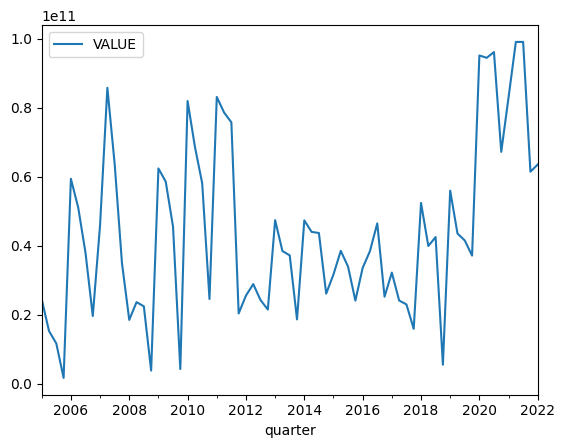

In [235]:
df_moex.loc[70,'VALUE'] = df_moex.loc[69,'VALUE']
df_moex.loc[66,'VALUE'] = df_moex.loc[65,'VALUE']
df_moex = df_moex.iloc[0:-3,:]
df_moex.plot(x='quarter', y='VALUE')
len(df_moex)

In [209]:
df_rgb = pd.read_csv('RGBI.csv')
df_rgb['Дата'] = pd.to_datetime(df_rgb['Дата'], format='%d.%m.%Y')
df_rgb.set_index('Дата', inplace=True)
df_rgb['quarter'] = df_rgb.index.to_period('Q')
df_rgb = df_rgb.groupby('quarter').last().reset_index(inplace=False)
df_rgb['Цена'] = df_rgb['Цена'].str.replace(',', '')
df_rgb['Цена'] = pd.to_numeric(df_rgb['Цена'])
df_rgb

,quarter,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,2005Q1,"113,62","114,24","114,35","113,23",NaN,"-0,64%"
1,2005Q2,"112,88","112,90","113,16","112,80",NaN,"0,00%"
2,2005Q3,"112,83","112,85","112,99","112,54",NaN,"-0,01%"
3,2005Q4,"115,82","117,79","118,22","115,46",NaN,"-1,63%"
4,2006Q1,"117,94","117,95","119,33","117,68",NaN,"0,00%"
...,...,...,...,...,...,...,...
65,2021Q2,"145,72","145,62","146,32","143,82",NaN,"0,08%"
66,2021Q3,"145,76","144,10","145,81","143,74",NaN,"1,17%"
67,2021Q4,"136,75","142,56","142,70","136,68",NaN,"-4,07%"
68,2022Q1,"128,99","135,78","136,68","127,14",NaN,"-4,99%"


69

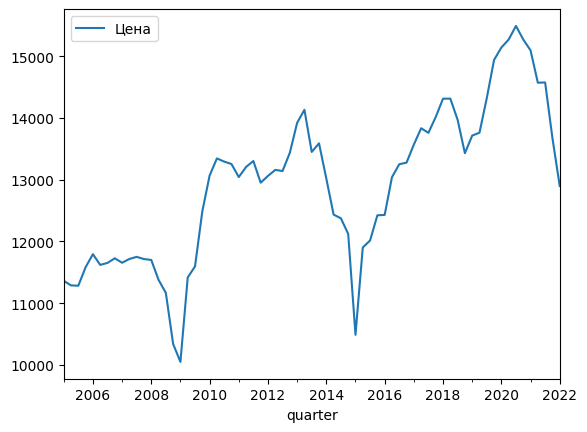

In [230]:
df_rgb = df_rgb.iloc[0:-1,:]
df_rgb.plot(x='quarter', y='Цена')
len(df_rgb)

,value,year
0,3630.5,2022-01-01
1,4321.3,2021-01-01
2,3464.8,2020-01-01
3,3658.5,2019-01-01
4,3969.5,2018-01-01
5,4243.5,2017-01-01
6,4263.9,2016-01-01
7,3889.4,2015-01-01
8,4137.4,2014-01-01
9,4130.7,2013-01-01


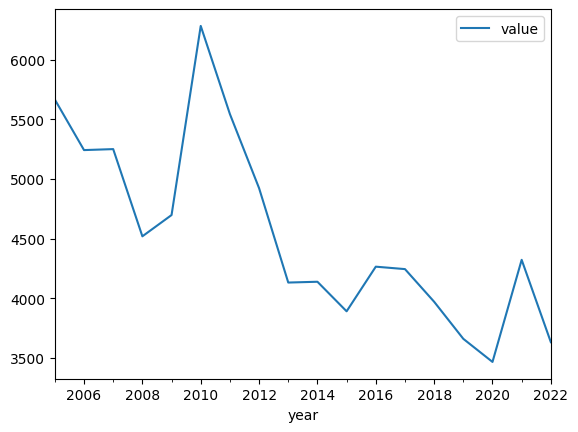

In [185]:
df_employ = pd.read_excel('unemployee.xlsx')
df_employ.columns=['value', 'year']
df_employ['year'] = pd.to_datetime(df_employ['year'], format='%Y')
df_employ.plot(x='year', y='value')
df_employ

In [236]:
print(len(df_moex), len(df_rgb), len(df_employ), len(quarterly_data[quarterly_data['slctn_nmbr']==1]),\
      len(quarterly_data[quarterly_data['slctn_nmbr']==2]), len(quarterly_data[quarterly_data['slctn_nmbr']==3]),\
      len(quarterly_data[quarterly_data['slctn_nmbr']==0]))
print(df_moex.iloc[-1,], df_rgb.iloc[-1,], quarterly_data[quarterly_data['slctn_nmbr']==1].iloc[-1,],\
      quarterly_data[quarterly_data['slctn_nmbr']==1].iloc[-1,],\
     quarterly_data[quarterly_data['slctn_nmbr']==1].iloc[-1,], quarterly_data[quarterly_data['slctn_nmbr']==1].iloc[-1,])

69 69 18 69 69 70 70
quarter           2022Q1
VALUE      63579147654.0
Name: 68, dtype: object quarter    2022Q1
Цена        12899
Откр.      135,78
Макс.      136,68
Мин.       127,14
Объём         NaN
Изм. %     -4,99%
Name: 68, dtype: object quarter               2022Q1
slctn_nmbr                 1
npo_accnt_id             261
npo_pmnts_sum    49359359.28
Name: 273, dtype: object quarter               2022Q1
slctn_nmbr                 1
npo_accnt_id             261
npo_pmnts_sum    49359359.28
Name: 273, dtype: object quarter               2022Q1
slctn_nmbr                 1
npo_accnt_id             261
npo_pmnts_sum    49359359.28
Name: 273, dtype: object quarter               2022Q1
slctn_nmbr                 1
npo_accnt_id             261
npo_pmnts_sum    49359359.28
Name: 273, dtype: object


In [277]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [275]:
target = quarterly_data[quarterly_data['slctn_nmbr']==1].reset_index(drop=True)
df = pd.concat([target, df_moex, df_rgb], join='inner', axis=1)
df = df[['quarter','npo_pmnts_sum', 'VALUE', 'Цена']]
df = df.iloc[:,2::]
df.index = df.loc[:, 'quarter'].reset_index(drop=True)
df = df[['npo_pmnts_sum', 'VALUE', 'Цена']]
df

,npo_pmnts_sum,VALUE,Цена
quarter,,,
2005Q1,2396138.06,2.452452e+10,11362
2005Q2,7150685.36,1.532838e+10,11288
2005Q3,22812857.60,1.172042e+10,11283
2005Q4,8233433.89,1.734784e+09,11582
2006Q1,7403720.88,5.943872e+10,11794
...,...,...,...
2021Q1,88221576.34,8.300467e+10,15096
2021Q2,58369098.05,9.910408e+10,14572
2021Q3,37219519.12,9.910408e+10,14576


In [278]:
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size, :], df.iloc[train_size:, :]
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')


# Важность признаков (временных рядов)
feature_importance = model.feature_importances_
print(f'Feature Importance: {feature_importance}')

MSE: 5284164.214263575, RMSE: 2298.7310008488544, MAE: 2110.68115234375, R^2: -7.524268088812557
Feature Importance: [0.4845306 0.5154694]
